# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [319]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [320]:
# Checking the number of mice.
mouse_count = merged_data["Mouse ID"].value_counts().count()
mouse_count

249

In [321]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data.loc[merged_data.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [322]:
# Optional: Get all the data for the duplicate mouse ID. 
badmouse = merged_data.loc[merged_data["Mouse ID"] == "g989"]
badmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [323]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = merged_data.drop(merged_data.loc[merged_data["Mouse ID"] == "g989"].index)
cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [324]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = cleaned_mice["Mouse ID"].value_counts().count()
mouse_count2

248

## Summary Statistics

In [325]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mice = cleaned_mice[["Tumor Volume (mm3)","Drug Regimen"]].groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = grouped_mice.mean().rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"}).reset_index()
median = grouped_mice.median().rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"}).reset_index()
variance = grouped_mice.var().rename(columns={"Tumor Volume (mm3)":"Variance of Tumor Volume (mm3)"}).reset_index()
deviation = grouped_mice.std().rename(columns={"Tumor Volume (mm3)":"Standard Deviation of Tumor Volume (mm3)"}).reset_index()
sem = grouped_mice.sem().rename(columns={"Tumor Volume (mm3)":"SEM of Tumor Volume (mm3)"}).reset_index()
summary = pd.merge(pd.merge(pd.merge(pd.merge(mean,median),variance),deviation),sem)
summary.set_index("Drug Regimen")







,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [326]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

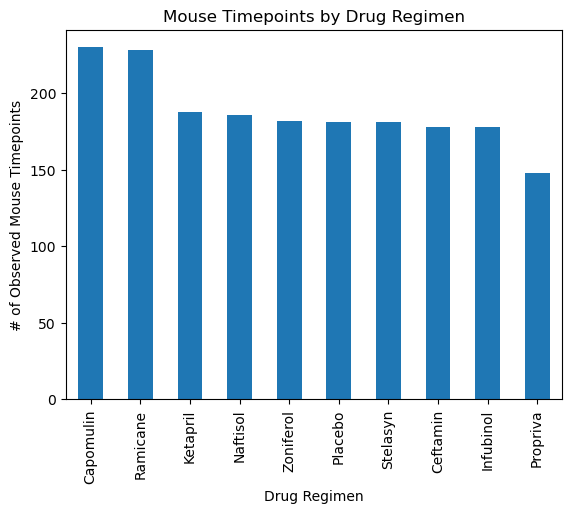

In [327]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar1 = grouped_mice.count().sort_values(
    by= "Tumor Volume (mm3)",ascending=False
    ).plot(kind = 'bar',legend=False,title="Mouse Timepoints by Drug Regimen"
           ).set_ylabel("# of Observed Mouse Timepoints")

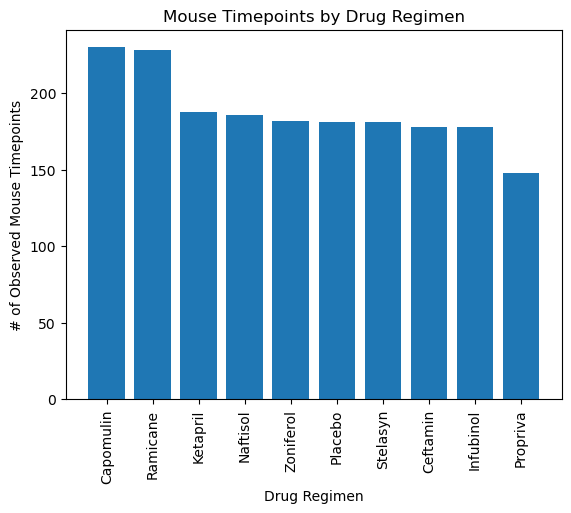

In [328]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_values = np.arange(len(grouped_mice))
height = grouped_mice.count().sort_values(by="Tumor Volume (mm3)",ascending=False).values.reshape(len(grouped_mice))
labels = grouped_mice.count().sort_values(by="Tumor Volume (mm3)",ascending=False).index
plt.bar(x_values,height)
plt.xticks(x_values,labels=labels,rotation= 'vertical')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Mouse Timepoints by Drug Regimen")
plt.show()


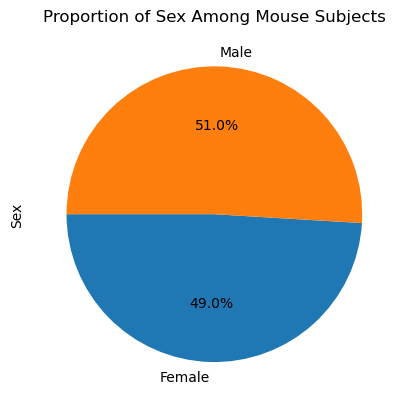

In [329]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = cleaned_mice.groupby("Sex")["Mouse ID"].count().plot(
    kind= 'pie',
    startangle = 180,
    autopct="%1.1f%%",
    title="Proportion of Sex Among Mouse Subjects",
    ylabel="Sex",
    )

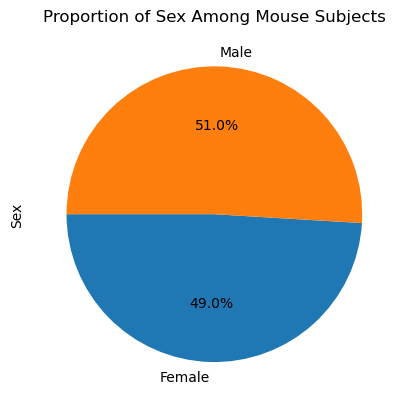

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2_data = cleaned_mice.groupby("Sex")["Mouse ID"].count()
labels = pie2_data.index
pie2 = plt.pie(pie2_data,labels=labels,autopct="%1.1f%%",startangle=180)
plt.ylabel("Sex")
plt.title("Proportion of Sex Among Mouse Subjects")
plt.show()


## Quartiles, Outliers and Boxplots

In [331]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_point = merged_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
len(max_point)
max_volume = []
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
for j in range(0,len(max_point)):
    volrow = pd.DataFrame(merged_data.loc[(merged_data["Mouse ID"]== max_point.iloc[j,0]) & (merged_data["Timepoint"]==max_point.iloc[j,1])])
    max_volume.append(volrow)
#resetting the index and making it not ugly
results = pd.concat(max_volume).reset_index().drop("index",axis=1)
results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [332]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = results.loc[results["Drug Regimen"] == "Capomulin"].reset_index()["Tumor Volume (mm3)"]
Ramicane = results.loc[results["Drug Regimen"] == "Ramicane"].reset_index()["Tumor Volume (mm3)"]
Infubinol = results.loc[results["Drug Regimen"] == "Infubinol"].reset_index()["Tumor Volume (mm3)"]
Ceftamin =results.loc[results["Drug Regimen"] == "Ceftamin"].reset_index()["Tumor Volume (mm3)"]
    # determining quartiles for each drug
quartiles = []
for treatment in treatments:
    quartiles.append(results.loc[results["Drug Regimen"] == treatment].reset_index()["Tumor Volume (mm3)"].quantile([.25,.5,.75]))
quartiles_df = pd.DataFrame(quartiles,index=treatments).reset_index()
iqr = quartiles_df.iloc[:,3]-quartiles_df.iloc[:,1]

    # Determine outliers using upper and lower bounds
upper_outliers = quartiles_df.iloc[:,3]+1.5*iqr
lower_outliers = quartiles_df.iloc[:,1]-1.5*iqr
outliers = []
for k in range(0,len(quartiles_df)):
    print(f"The outliers for {quartiles_df.iloc[k,0]} are above {round(upper_outliers[k],2)} mm3 and below {round(lower_outliers[k],2)} mm3.")
    row = results.loc[(results["Drug Regimen"]==quartiles_df.iloc[k,0]) &((results["Tumor Volume (mm3)"]>upper_outliers[k])|(results["Tumor Volume (mm3)"]<lower_outliers[k]))]
    # adding the outlier to outliers if it exists
    if not(row.empty):
        outliers.append(row)
#printing all outliers
for j in range(0,len(outliers)):
    print(f"Outlier {j+1}: {outliers[j].iloc[j,1]} - {round(outliers[j].iloc[j,6],2)} mm3")

The outliers for Capomulin are above 51.83 mm3 and below 20.7 mm3.
The outliers for Ramicane are above 54.31 mm3 and below 17.91 mm3.
The outliers for Infubinol are above 82.74 mm3 and below 36.83 mm3.
The outliers for Ceftamin are above 87.67 mm3 and below 25.36 mm3.
Outlier 1: Infubinol - 36.32 mm3


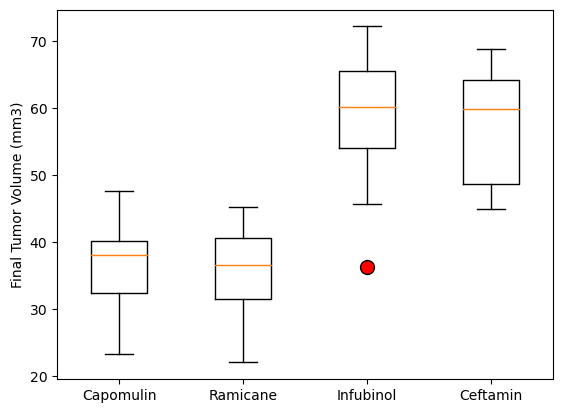

In [333]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([Capomulin,
             Ramicane,
             Infubinol,
             Ceftamin],
            flierprops={'marker':'o','markerfacecolor': 'r','markersize':10})
plt.xticks(np.arange(1,5),treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

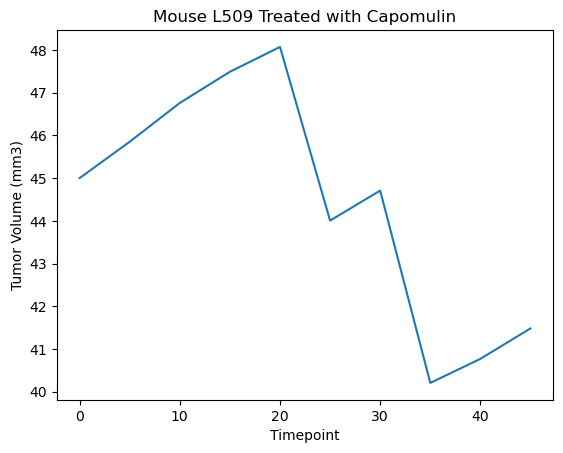

In [334]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = merged_data.loc[merged_data["Mouse ID"] == 'l509']
line_data = single_mouse.set_index("Timepoint")["Tumor Volume (mm3)"]
line_data.plot(kind='line',ylabel="Tumor Volume (mm3)",title="Mouse L509 Treated with Capomulin")
plt.show()

Text(0, 0.5, 'Average Observed Tumor Volume (mm3)')

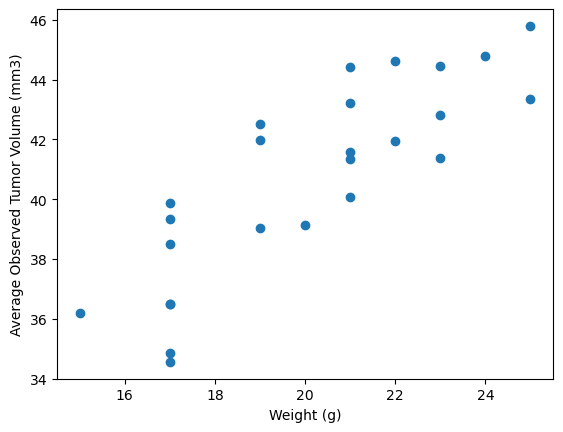

In [335]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap_reg = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"][["Mouse ID","Tumor Volume (mm3)","Weight (g)"]].groupby("Mouse ID").mean()
x_values = Cap_reg["Weight (g)"]
y_values = Cap_reg["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between weight and tumor size is 0.84.


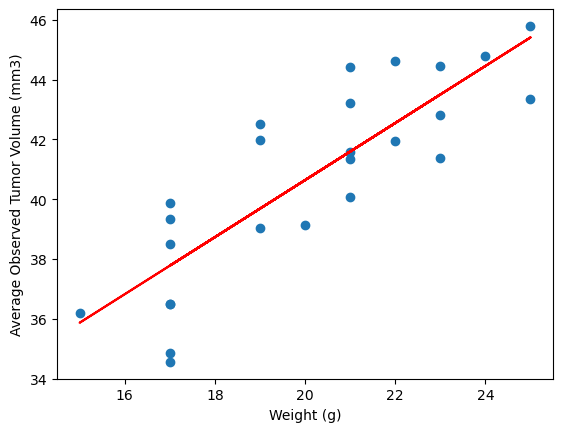

In [336]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
print(f"The correlation coefficient between weight and tumor size is {round(rvalue,2)}.")